# Now working on an updated version of the software

In [1]:
options(repr.plot.width=5, repr.plot.height=5)
library(readr)
library(ggplot2)
library(tibble)
theme_set(theme_classic(base_size = 18))



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NAME = col_character()
)
ℹ Use `spec()` for the full column specifications.




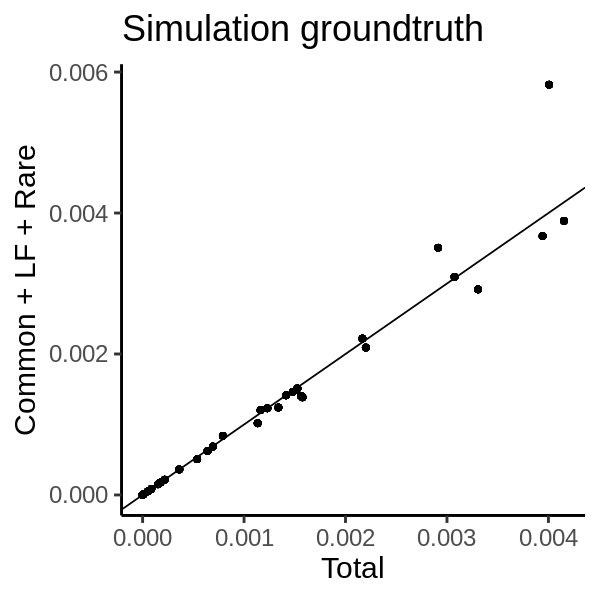

In [3]:
df <- read_tsv("out/summary/param_0.tsv")
df_plot <- tibble(x=df$ALL_TRUE_VAR, y=df$COMMON_TRUE_VAR + df$RARE_TRUE_VAR + df$LF_TRUE_VAR)

ggplot(data=df_plot, aes(x=x, y=y)) + 
    geom_point() + 
    geom_abline(slope=1, intercept=0) + 
    labs(x="Total", y="Common + LF + Rare") +
    ggtitle("Simulation groundtruth")

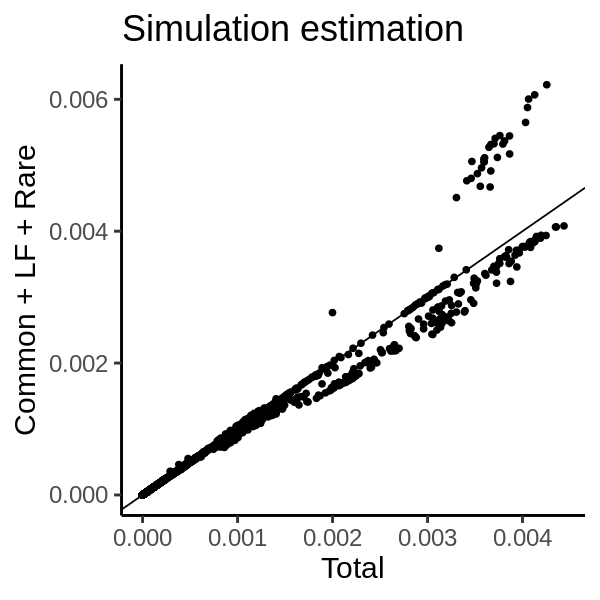

In [54]:
df_plot <- tibble(x=tbl$ALL_MEAN, y=tbl$COMMON_MEAN + tbl$RARE_MEAN + tbl$LF_MEAN)

ggplot(data=df_plot, aes(x=x, y=y)) + 
    geom_point() + 
    geom_abline(slope=1, intercept=0) +
    labs(x="Total", y="Common + LF + Rare") +
    ggtitle("Simulation estimation")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NAME = col_character(),
  STRAND = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NAME = col_character(),
  STRAND = col_character()
)
ℹ Use `spec()` for the full column specifications.




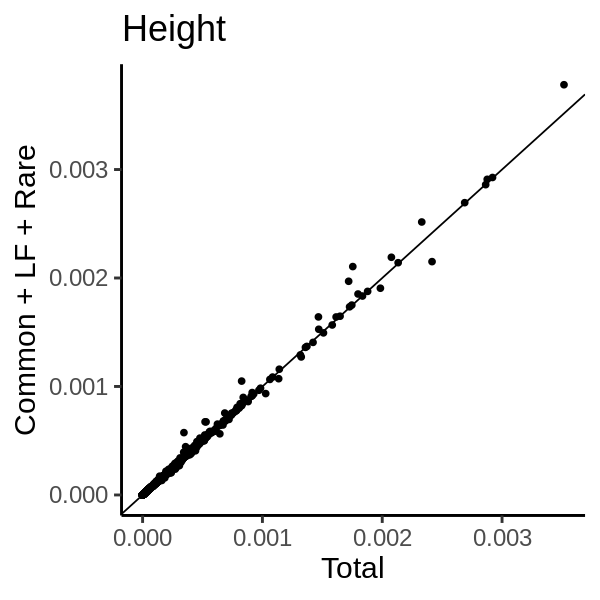

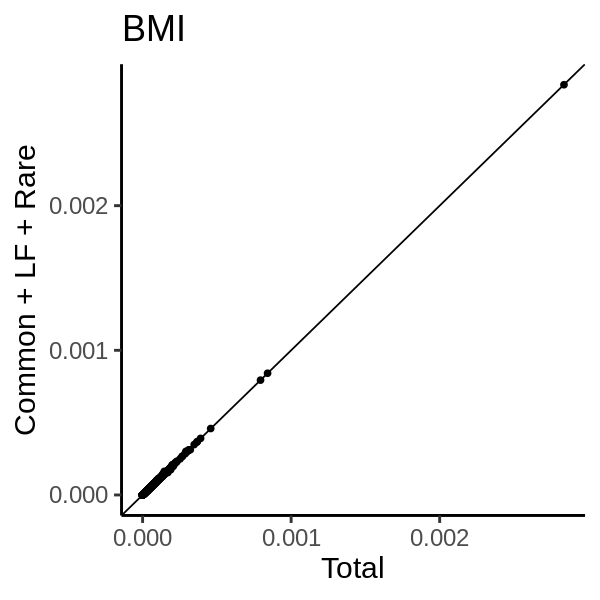

In [57]:
df <- read_tsv("/u/project/pasaniuc/kangchen/h2gene/analysis/ukbb/out/summary/height.tsv")

df_plot <- tibble(x=df$ANNOT_BODYTSS_ALL_MEAN, y=df$ANNOT_BODYTSS_COMMON_MEAN + df$ANNOT_BODYTSS_RARE_MEAN + df$ANNOT_BODYTSS_LF_MEAN)
ggplot(data=df_plot, aes(x=x, y=y)) + 
    geom_point() + 
    geom_abline(slope=1, intercept=0) +
    labs(x="Total", y="Common + LF + Rare") +
    ggtitle("Height")

df <- read_tsv("/u/project/pasaniuc/kangchen/h2gene/analysis/ukbb/out/summary/bmi.tsv")

df_plot <- tibble(x=df$ANNOT_BODYTSS_ALL_MEAN, y=df$ANNOT_BODYTSS_COMMON_MEAN + df$ANNOT_BODYTSS_RARE_MEAN + df$ANNOT_BODYTSS_LF_MEAN)
ggplot(data=df_plot, aes(x=x, y=y)) + 
    geom_point() + 
    geom_abline(slope=1, intercept=0) +
    labs(x="Total", y="Common + LF + Rare") +
    ggtitle("BMI")

In [4]:
a <- read_tsv("./out/summary/param_0.tsv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NAME = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [5]:
b <- read_tsv("/u/project/pasaniuc/kangchen/h2gene/analysis/simulation/out/estimate/20_0.001_5_3/summary.tsv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NAME = col_character()
)
ℹ Use `spec()` for the full column specifications.




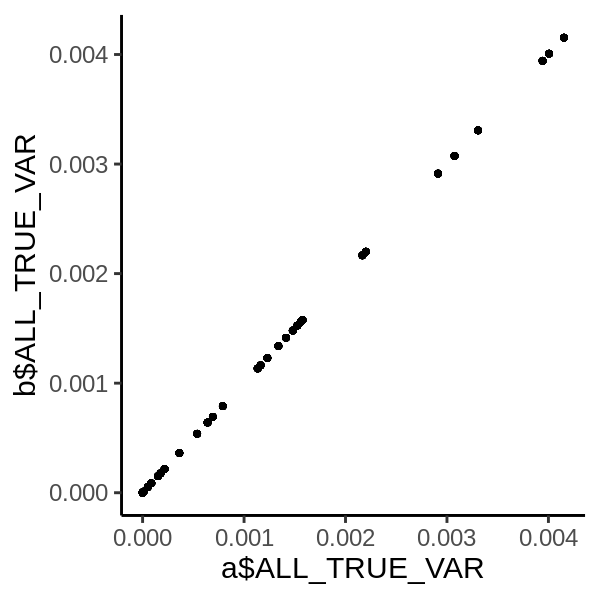

In [6]:
qplot(a$ALL_TRUE_VAR, b$ALL_TRUE_VAR)

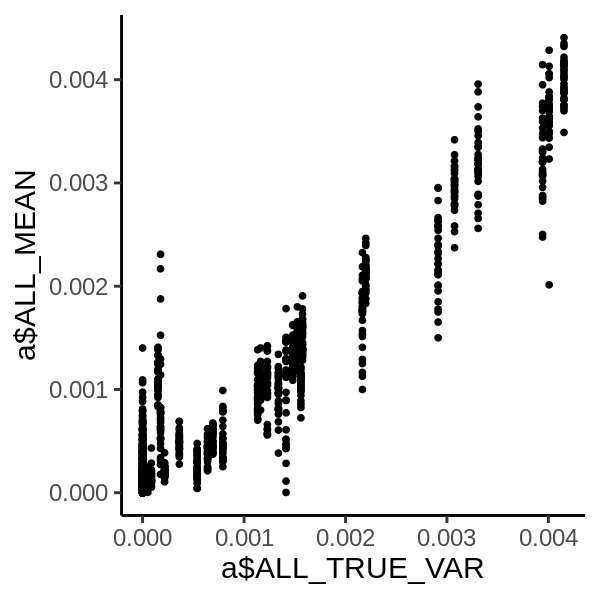

In [8]:
qplot(a$ALL_TRUE_VAR, a$ALL_MEAN)

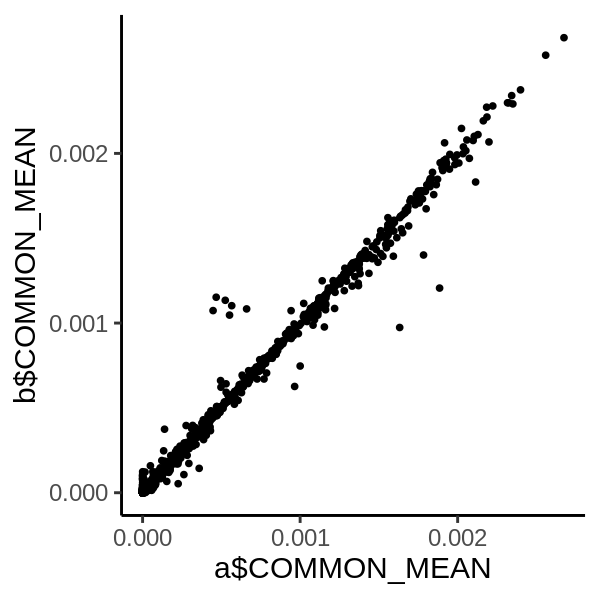

In [7]:
qplot(a$COMMON_MEAN, b$COMMON_MEAN)

In [30]:
dim(b)

[1] 32490    34

In [1]:
library(optparse)
library(readr)
library(RcppCNPy)
library(tibble)
library(dplyr)
library(ggplot2)
library(patchwork)
library(reticulate)
source(here::here("src", "h2gene_utils.R"))


np <- import("numpy")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
            par_estimate <- tryCatch(
                {
                    readRDS(rds_file)
                },
                error = function(e) {
                    print(e)
                    print(rds_file)
                    unlink(rds_file)
                    file_missing <- TRUE
                    next
                }
            )

In [14]:
par_gene_list

CHR,START,STOP,STRAND,NAME
<int>,<int>,<int>,<chr>,<chr>
1,859993,879961,+,SAMD11
1,879583,894679,-,NOC2L
1,955503,991499,+,AGRN
1,1017198,1051736,-,C1orf159
1,1109286,1133315,+,TTLL10
1,1152288,1167447,-,SDF4
1,1189292,1209234,-,UBE2J2
1,1227764,1243304,-,ACAP3
1,1407139,1444852,+,ATAD3B


In [32]:
rds1 <- readRDS("out/estimate/param_0/sim_3_par_3.rds")
rds2 <- readRDS("out/OLD_estimate/param_0/sim_3_par_3.rds")
rds3 <- readRDS("/u/project/pasaniuc/kangchen/h2gene/analysis/simulation/out/estimate/20_0.001_5_3/sim_3_par_3.rds")


In [47]:
rds1 <- readRDS("out/estimate/param_0/sim_0_par_0.rds")
rds2 <- readRDS("/u/project/pasaniuc/kangchen/h2gene/analysis/simulation/out/estimate/20_0.01_5_3/sim_0_par_0.rds")

In [ ]:
# pheno1 = np.load("simulated_gwas/pheno.npy")
# OLD_DIR = (
#     "/u/project/pasaniuc/kangchen/h2gene/analysis/simulation/out/sim/gwas/20_0.001_5_3"
# )
# pheno2 = np.load(join(OLD_DIR, "phe.npy"))

# beta_hat1 = np.load("simulated_gwas/beta_hat.npy")
# OLD_DIR = (
#     "/u/project/pasaniuc/kangchen/h2gene/analysis/simulation/out/sim/gwas/20_0.001_5_3"
# )
# beta_hat2 = np.load(join(OLD_DIR, "beta_hat.npy"))